# LiDAR Uncertainty at SOAP and SJER NEON sites

# Week 03- Lidar Data Compared to Ground Measurements: Understanding Uncertainty

This week you will work with LiDAR data. You will explore the values in a LiDAR dataset - specifically tree height from a canopy height model. You will compare these measurements to the same types of measurements made by humans in the field.

You can download the data for this week from earthpy using: 

`et.data.get_data('spatial-vector-lidar')`

For both the SJER and SOAP field sites, create scatterplots (with regression and 1:1 lines) that compare:
* **MAXIMUM** canopy height model height in meters, extracted within a 20 meter radius, compared to **MAXIMUM** tree
height derived from the *insitu* field site data.
* **MEAN** canopy height model height in meters, extracted within a 20 meter radius, compared to **MEAN** tree height derived from the *insitu* field site data.

Create one figure for each site with two subplots (ax1, ax2): one for the Max comparison and one for the Mean comparison.


## For All Plots

* Place lidar data values on the X axis and human measured tree height on the Y axis.
* Include a calculated **regression line** (HINT: use `sns.regplot()` to achieve this line) that describes the relationship of lidar of the data.
* Include a separate **1:1 line** that can be used to compare the regression fit to a perfect 1:1 fit. 
* Set the x and y limits to be the SAME for each individual plot. (e.g. for plot 3, the x and y limits are set to the same range). 
* Label x and y axes appropriately - include units.
* Add a title to your plot that describes what the plot shows.
* Ensure that your notebook is fully reproducible. This means you will:
   * Create reproducible paths using the os module
   * Download the data using code in the notebook


## Set up your analysis

In the following cell, import the libraries you use in this notebook, and change your working directory so that your paths are reproducible. Note that `earthpy` will download the data to `~` > `earth-analytics` > `data` >`spatial-vector-lidar`

In [1]:
import os
import pathlib

import earthpy as et
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterstats as rs
import pandas as pd
import xarray as xr
import rioxarray as rxr
import seaborn as sns

et.data.get_data('spatial-vector-lidar')

home_dir = os.path.join(
    pathlib.Path.home(),
    'earth-analytics',
    'data',
    'spatial-vector-lidar')
os.chdir(home_dir)

## SJER Lidar vs Insitu Comparison Plots
You will use the following SJER data for this figure:
* `spatial-vector-lidar/california/neon-sjer-site/2013/insitu/veg_structure/D17_2013_SJER_vegStr.csv`
* `spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_plot_centroids.shp`

Create a figure with 2 subplots for the NEON San Joaquin Experimental Range (SJER) field site.
* Plot 1 should show **max** lidar vs insitu height with lidar on the x axis and insitu height on the y axis.
* Plot 2 should show **mean** lidar vs insitu height with lidar on the x axis and insitu height on the y axis.

For each plot:
1. Set the x and y lims to be the same range: `(0, 30)` using `xlim=` and `ylim=`. This will make the plots more comparable.
2. Add a title that includes the field site name and the measurement being displayed (max or min height).
3. Add a 1:1 line to each plot.
4. Add a regression line using `sns.regplot()`. SNS is the alias for the seaborn plotting package (`import seaborn as sns`).

To create this plot, you will need to calculate a summary data frame for each site that contains both the lidar mean and max values and insitu (measured on the ground by humans) mean and max values. In the following cell, compute the summary values for the LiDAR data. **For the tests to work, rename your summary columns `lidar_max` and `lidar_mean`, and call your `GeoDataFrame`at the end of your answer cell.**


In [2]:
# Paths to SJER data
sjer_base_dir = os.path.join(
    'california',
    'neon-sjer-site')

sjer_insitu_path = os.path.join(
    sjer_base_dir,
    '2013',
    'insitu',
    'veg_structure',
    'D17_2013_SJER_vegStr.csv')

sjer_chm_path = os.path.join(
    sjer_base_dir,
    '2013',
    'lidar',
    'SJER_lidarCHM.tif')

sjer_plots_path = os.path.join(
    sjer_base_dir,
    'vector_data',
    'SJER_plot_centroids.shp')

In [3]:
sjer_plots_gdf = gpd.read_file(sjer_plots_path)
sjer_plots_gdf.geometry = sjer_plots_gdf.geometry.buffer(20)

sjer_chm_stats = rs.zonal_stats(
    sjer_plots_gdf, 
    sjer_chm_path, 
    stats=['mean', 'max'], 
    geojson_out=True, 
    nodata=0, 
    copy_properties=True)

sjer_chm_stats_gdf = gpd.GeoDataFrame.from_features(sjer_chm_stats)
sjer_chm_stats_gdf.rename(
    columns={'max': 'lidar_max', 'mean': 'lidar_mean'},
    inplace=True
)

sjer_chm_stats_gdf

,geometry,Plot_ID,Point,northing,easting,plot_type,lidar_max,lidar_mean
0,"POLYGON ((255872.376 4111567.818, 255872.280 4...",SJER1068,center,4111567.818,255852.376,trees,19.049999,11.544347
1,"POLYGON ((257426.967 4111298.971, 257426.871 4...",SJER112,center,4111298.971,257406.967,trees,24.019999,10.369277
2,"POLYGON ((256858.760 4110819.876, 256858.664 4...",SJER116,center,4110819.876,256838.760,grass,16.070000,7.518398
3,"POLYGON ((256196.947 4108752.026, 256196.851 4...",SJER117,center,4108752.026,256176.947,trees,11.059999,7.675346
4,"POLYGON ((255988.372 4110476.079, 255988.276 4...",SJER120,center,4110476.079,255968.372,grass,5.740000,4.591177
5,"POLYGON ((257098.867 4111388.570, 257098.771 4...",SJER128,center,4111388.570,257078.867,trees,19.139999,8.987087
6,"POLYGON ((256703.434 4111071.087, 256703.338 4...",SJER192,center,4111071.087,256683.434,grass,16.549999,7.229096
7,"POLYGON ((256737.467 4112167.778, 256737.371 4...",SJER272,center,4112167.778,256717.467,trees,11.840000,7.107061
8,"POLYGON ((256054.390 4111533.879, 256054.294 4...",SJER2796,center,4111533.879,256034.390,soil,20.279999,6.409630
9,"POLYGON ((258517.102 4109856.983, 258517.006 4...",SJER3239,center,4109856.983,258497.102,soil,12.910000,6.009128


In the following cell, compute the summary values for the insitu data, and merge the results with the LiDAR GeoDataFrame. **Name the new columns `insitu_max` and `insitu_mean` and call the completed `GeoDataFrame` at the end of you answer cell for the tests to work**

In [4]:
# Loading the insitu data
sjer_insitu_df = (
    pd.read_csv(sjer_insitu_path)
    .groupby('plotid')
    .stemheight
    .agg(['max', 'mean'])
    .rename(columns={'max': 'insitu_max', 'mean': 'insitu_mean'}))
sjer_insitu_df

,insitu_max,insitu_mean
plotid,,
SJER1068,19.3,3.866667
SJER112,23.9,8.221429
SJER116,16.0,8.218750
SJER117,11.0,6.512500
SJER120,8.8,7.600000
SJER128,18.2,5.211765
SJER192,13.7,6.769565
SJER272,12.4,6.819048
SJER2796,9.4,5.085714


In [5]:
# Merge insitu and LiDAR Data
sjer_df = (
    sjer_chm_stats_gdf
    .merge(sjer_insitu_df, right_index=True, left_on='Plot_ID'))
sjer_df

,geometry,Plot_ID,Point,northing,easting,plot_type,lidar_max,lidar_mean,insitu_max,insitu_mean
0,"POLYGON ((255872.376 4111567.818, 255872.280 4...",SJER1068,center,4111567.818,255852.376,trees,19.049999,11.544347,19.3,3.866667
1,"POLYGON ((257426.967 4111298.971, 257426.871 4...",SJER112,center,4111298.971,257406.967,trees,24.019999,10.369277,23.9,8.221429
2,"POLYGON ((256858.760 4110819.876, 256858.664 4...",SJER116,center,4110819.876,256838.760,grass,16.070000,7.518398,16.0,8.218750
3,"POLYGON ((256196.947 4108752.026, 256196.851 4...",SJER117,center,4108752.026,256176.947,trees,11.059999,7.675346,11.0,6.512500
4,"POLYGON ((255988.372 4110476.079, 255988.276 4...",SJER120,center,4110476.079,255968.372,grass,5.740000,4.591177,8.8,7.600000
5,"POLYGON ((257098.867 4111388.570, 257098.771 4...",SJER128,center,4111388.570,257078.867,trees,19.139999,8.987087,18.2,5.211765
6,"POLYGON ((256703.434 4111071.087, 256703.338 4...",SJER192,center,4111071.087,256683.434,grass,16.549999,7.229096,13.7,6.769565
7,"POLYGON ((256737.467 4112167.778, 256737.371 4...",SJER272,center,4112167.778,256717.467,trees,11.840000,7.107061,12.4,6.819048
8,"POLYGON ((256054.390 4111533.879, 256054.294 4...",SJER2796,center,4111533.879,256034.390,soil,20.279999,6.409630,9.4,5.085714
9,"POLYGON ((258517.102 4109856.983, 258517.006 4...",SJER3239,center,4109856.983,258497.102,soil,12.910000,6.009128,17.9,3.920833


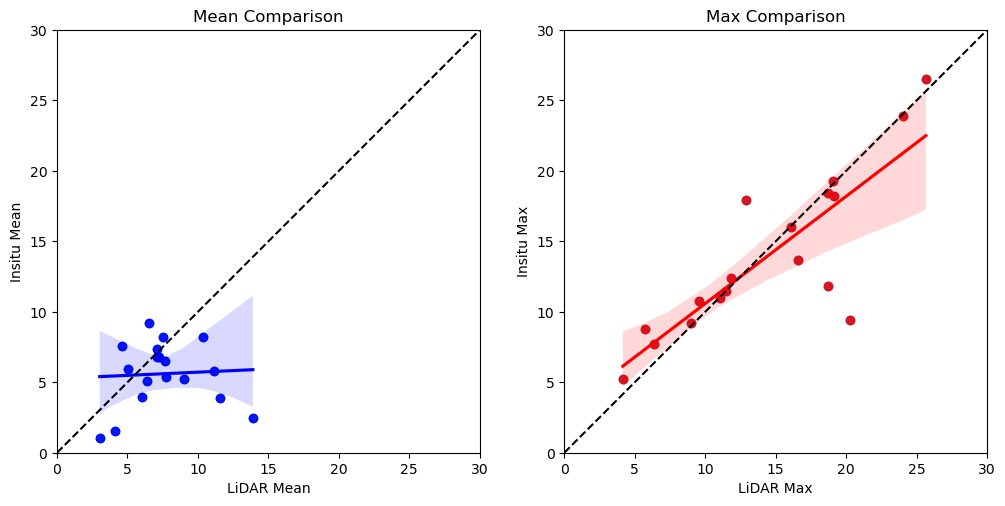

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1
ax1.scatter(sjer_df['lidar_mean'], sjer_df['insitu_mean'])
ax1.set(xlim=(0, 30), ylim=(0, 30), aspect='equal')
sns.regplot(x='lidar_mean', y='insitu_mean', 
            data=sjer_df, color='blue', ax=ax1)
ax1.plot((0, 1), (0, 1), transform=ax1.transAxes, ls='--', c='k')
ax1.set_xlabel('LiDAR Mean')
ax1.set_ylabel('Insitu Mean')
ax1.set_title('Mean Comparison')

# Subplot 2
ax2.scatter(sjer_df['lidar_max'], sjer_df['insitu_max'])
ax2.set(xlim=(0, 30), ylim=(0, 30), aspect='equal')
sns.regplot(x='lidar_max', y='insitu_max', 
            data=sjer_df, color='red', ax=ax2)
ax2.plot((0, 1), (0, 1), transform=ax2.transAxes, ls='--', c='k')
ax2.set_xlabel('LiDAR Max')
ax2.set_ylabel('Insitu Max')
ax2.set_title('Max Comparison')

plt.show()

## Figure 2: Plots 3 & 4 - SOAP Lidar vs Insitu Comparison Plots (15 points for each subplot)

You will use the following SOAP data for this figure:
* `spatial-vector-lidar/california/neon-soap-site/2013/insitu/veg-structure/D17_2013_SOAP_vegStr.csv`
* `spatial-vector-lidar/california/neon-soap-site/vector_data/SOAP_centroids.shp`

Create a figure with 2 subplots for the NEON Soaproot Saddle (SOAP) field site.
* Plot 1 should show **max** lidar vs insitu height with lidar on the x axis and insitu height on the y axis.
* Plot 2 should show **mean** lidar vs insitu height with lidar on the x axis and insitu height on the y axis.

For each plot:

1. Set the x and y lims to be the same range using `xlim=` and `ylim=`: 
    * `(0, 140)` for the SOAP Max height plot. 
    * `(0, 40)` for the SOAP Mean height plot. 
2. Add a title that includes the field site name and the measurement being displayed (max or min height).
3. Add a 1:1 line to each plot.
4. Add a regression line using `sns.regplot()`

To create this plot, you will need to calculate a summary data frame for each site that contains lidar mean and max values and insitu (measured on the ground by humans) mean and max values.

**HINT**: the SOAP data have some inconsistencies in the column headings. One way to fix this is to use the syntax: 

`"text-to-append-to-column" + dataframe_name["column-name-here"]`

In the following cell, import and process the SOAP data like you did the SJER data. **Make sure to call your combined `GeoDataFrame` at the end of cell for the test cell to work.**

### In the cell below plot the SOAP site values the same way your plotted the SJER site values

In [7]:
# Paths to SOAP data
soap_base_dir = os.path.join(
    'california',
    'neon-soap-site')

soap_insitu_path = os.path.join(
    soap_base_dir,
    '2013',
    'insitu',
    'veg-structure',
    'D17_2013_SOAP_vegStr.csv')

soap_chm_path = os.path.join(
    soap_base_dir,
    '2013',
    'lidar',
    'SOAP_lidarCHM.tif')

soap_plots_path = os.path.join(
    soap_base_dir,
    'vector_data',
    'SOAP_centroids.shp')

In [8]:
soap_plots_gdf = gpd.read_file(soap_plots_path)
soap_plots_gdf.geometry = soap_plots_gdf.geometry.buffer(20)

soap_chm_stats = rs.zonal_stats(
    soap_plots_gdf, 
    soap_chm_path, 
    stats=['mean', 'max'], 
    geojson_out=True, 
    nodata=0, 
    copy_properties=True)

soap_chm_stats_gdf = gpd.GeoDataFrame.from_features(soap_chm_stats)
soap_chm_stats_gdf.rename(
    columns={'max': 'lidar_max', 'mean': 'lidar_mean'},
    inplace=True
)
soap_chm_stats_gdf

,geometry,OBJECTID,ID,plotType,subtype,plotDimens,Protocols,lidar_max,lidar_mean
0,"POLYGON ((297815.197 4101493.028, 297815.101 4...",1,27,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",50.250000,20.455827
1,"POLYGON ((297065.197 4100713.028, 297065.101 4...",2,43,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",54.099998,19.804080
2,"POLYGON ((299825.197 4101013.028, 299825.101 4...",3,63,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",32.480000,16.989834
3,"POLYGON ((298175.197 4101433.028, 298175.101 4...",4,91,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",50.309998,21.980976
4,"POLYGON ((298715.197 4100833.028, 298715.101 4...",5,95,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",33.869999,17.412048
5,"POLYGON ((297065.197 4100083.028, 297065.101 4...",6,139,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",49.919998,19.417840
6,"POLYGON ((299885.197 4100413.028, 299885.101 4...",7,143,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",27.340000,10.454653
7,"POLYGON ((297545.197 4100533.028, 297545.101 4...",8,187,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",47.959999,13.221389
8,"POLYGON ((298775.197 4101403.028, 298775.101 4...",9,287,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",53.969997,17.602865
9,"POLYGON ((297515.197 4100683.028, 297515.101 4...",10,299,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",34.189999,18.852112


In [9]:
# Unify ID column value names
soap_chm_stats_gdf['ID'] = soap_chm_stats_gdf['ID'].apply(
    lambda x: 'SOAP' + str(x))
soap_chm_stats_gdf

,geometry,OBJECTID,ID,plotType,subtype,plotDimens,Protocols,lidar_max,lidar_mean
0,"POLYGON ((297815.197 4101493.028, 297815.101 4...",1,SOAP27,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",50.250000,20.455827
1,"POLYGON ((297065.197 4100713.028, 297065.101 4...",2,SOAP43,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",54.099998,19.804080
2,"POLYGON ((299825.197 4101013.028, 299825.101 4...",3,SOAP63,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",32.480000,16.989834
3,"POLYGON ((298175.197 4101433.028, 298175.101 4...",4,SOAP91,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",50.309998,21.980976
4,"POLYGON ((298715.197 4100833.028, 298715.101 4...",5,SOAP95,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",33.869999,17.412048
5,"POLYGON ((297065.197 4100083.028, 297065.101 4...",6,SOAP139,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",49.919998,19.417840
6,"POLYGON ((299885.197 4100413.028, 299885.101 4...",7,SOAP143,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",27.340000,10.454653
7,"POLYGON ((297545.197 4100533.028, 297545.101 4...",8,SOAP187,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",47.959999,13.221389
8,"POLYGON ((298775.197 4101403.028, 298775.101 4...",9,SOAP287,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",53.969997,17.602865
9,"POLYGON ((297515.197 4100683.028, 297515.101 4...",10,SOAP299,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",34.189999,18.852112


In [10]:
# Loading the LiDAR data 
soap_insitu_df = (
    pd.read_csv(soap_insitu_path)
    .groupby('plotid')
    .stemheight
    .agg(['max', 'mean'])
    .rename(columns={'max': 'insitu_max', 'mean': 'insitu_mean'}))
soap_insitu_df

,insitu_max,insitu_mean
plotid,,
SOAP1343,6.5,2.112500
SOAP139,120.0,4.745902
SOAP143,19.7,2.530702
SOAP1515,3.4,1.776923
SOAP1563,1.9,1.071429
SOAP1611,4.2,1.720000
SOAP1695,17.0,3.056604
SOAP187,134.0,4.878947
SOAP223,8.2,2.444186


In [11]:
# Merge insitu and LiDAR Data
soap_df = (
    soap_chm_stats_gdf
    .merge(soap_insitu_df, right_index=True, left_on='ID'))
soap_df

,geometry,OBJECTID,ID,plotType,subtype,plotDimens,Protocols,lidar_max,lidar_mean,insitu_max,insitu_mean
1,"POLYGON ((297065.197 4100713.028, 297065.101 4...",2,SOAP43,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",54.099998,19.804080,51.1,5.047000
2,"POLYGON ((299825.197 4101013.028, 299825.101 4...",3,SOAP63,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",32.480000,16.989834,33.0,9.232787
4,"POLYGON ((298715.197 4100833.028, 298715.101 4...",5,SOAP95,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",33.869999,17.412048,28.1,6.050943
5,"POLYGON ((297065.197 4100083.028, 297065.101 4...",6,SOAP139,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",49.919998,19.417840,120.0,4.745902
6,"POLYGON ((299885.197 4100413.028, 299885.101 4...",7,SOAP143,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",27.340000,10.454653,19.7,2.530702
7,"POLYGON ((297545.197 4100533.028, 297545.101 4...",8,SOAP187,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",47.959999,13.221389,134.0,4.878947
9,"POLYGON ((297515.197 4100683.028, 297515.101 4...",10,SOAP299,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",34.189999,18.852112,33.1,13.896154
10,"POLYGON ((297065.197 4100593.028, 297065.101 4...",11,SOAP331,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",45.500000,18.149803,39.2,5.009848
22,"POLYGON ((299315.197 4101463.028, 299315.101 4...",23,SOAP223,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",13.469999,6.155488,8.2,2.444186
23,"POLYGON ((297785.197 4101193.028, 297785.101 4...",24,SOAP283,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",19.369999,5.781789,13.8,3.328571


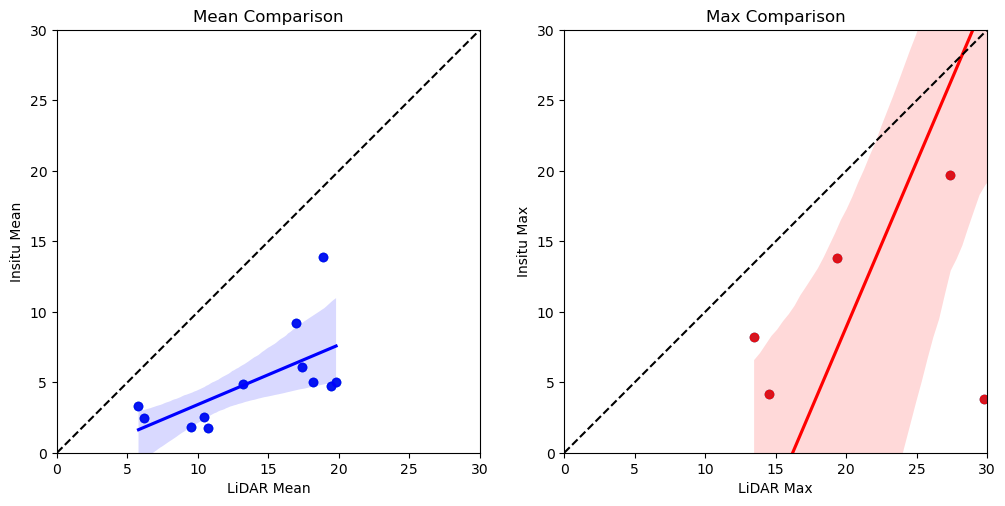

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1
ax1.scatter(soap_df['lidar_mean'], soap_df['insitu_mean'])
ax1.set(xlim=(0, 30), ylim=(0, 30), aspect='equal')
sns.regplot(x='lidar_mean', y='insitu_mean', 
            data=soap_df, color='blue', ax=ax1)
ax1.plot((0, 1), (0, 1), transform=ax1.transAxes, ls='--', c='k')
ax1.set_xlabel('LiDAR Mean')
ax1.set_ylabel('Insitu Mean')
ax1.set_title('Mean Comparison')

# Subplot 2
ax2.scatter(soap_df['lidar_max'], soap_df['insitu_max'])
ax2.set(xlim=(0, 30), ylim=(0, 30), aspect='equal')
sns.regplot(x='lidar_max', y='insitu_max', 
            data=soap_df, color='red', ax=ax2)
ax2.plot((0, 1), (0, 1), transform=ax2.transAxes, ls='--', c='k')
ax2.set_xlabel('LiDAR Max')
ax2.set_ylabel('Insitu Max')
ax2.set_title('Max Comparison')

plt.show()

## Question 1 Figure One: SJER mean vs max height -- Plots 1 and 2 Interpretation
In the markdown cell below, answer the following questions:

1. Looking at the plots above, which metric: mean or max height, has a stronger relationship or is closer to a one:one relationship?
2. List one reason why mean or max (whatever you answered for question 1 above) has a stronger relationship.

You answers can be brief -- a single word or sentence or two is fine. 

1. max height has a stronger relationship of liDAR and insitu measurements, since the points are more aligned the 1:1 line.
2. One reason why the maximum height may have a stronger relationship is that it captures the extreme values in the data. The maximum height represents the highest point in the vegetation structure, which can be influenced by factors such as tree canopies, tall vegetation, or other vertical structures. This measurement is less affected by the variations in the overall distribution of heights and can provide a more direct comparison between LiDAR measurements and ground-based measurements.


## Question 2. Of all four relationships that you plotted above, which site (SOAP or SJER) and metric (mean or max height) showed the strongest relationship? 

**A strong relationship is one that is closer to 1:1 in this case.**

Add your answer in the markdown cell below. It can be short - 2-5 sentences. You do not need to perform any additional calculations. Consider the readings and the data and suggest why a particular metric might have a strong relationship.

Maximum LiDAR and insitu comparison of SJER site,  since the points are more aligned the 1:1 line.

## Question 3. List 2 reasons why lidar max height values may be larger than human measurements.

Add your answer to the markdown cell below.

## Question 4. List 2 systematic sources of error could impact differences between lidar and measured tree height values ( 5 points)

Add your answer in the markdown cell below.

1. vegetation penetration
2. Ground filtering or terrain effects

## Question 5. List 2 random sources of error that could impact differences between lidar and measured tree height values.  (5 points)

Add your answer to the markdown cell below. Note that you can provide sources of random error for lidar OR insitu measurements. You only need two total examples. 

1. Measurement noise
2. Sampling bias